In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [65]:
files = glob.glob('../results/a2-Apr2/e*') 

In [66]:
files, len(files)

(['../results/a2-Apr2/errors9.pkl.gz',
  '../results/a2-Apr2/errors7.pkl.gz',
  '../results/a2-Apr2/errors1.pkl.gz',
  '../results/a2-Apr2/errors8.pkl.gz',
  '../results/a2-Apr2/errors11.pkl.gz',
  '../results/a2-Apr2/errors2.pkl.gz',
  '../results/a2-Apr2/errors3.pkl.gz',
  '../results/a2-Apr2/errors5.pkl.gz',
  '../results/a2-Apr2/errors10.pkl.gz',
  '../results/a2-Apr2/errors6.pkl.gz',
  '../results/a2-Apr2/errors4.pkl.gz',
  '../results/a2-Apr2/errors0.pkl.gz',
  '../results/a2-Apr2/errors13.pkl.gz',
  '../results/a2-Apr2/errors12.pkl.gz',
  '../results/a2-Apr2/errors83.pkl.gz',
  '../results/a2-Apr2/errors17.pkl.gz',
  '../results/a2-Apr2/errors15.pkl.gz',
  '../results/a2-Apr2/errors19.pkl.gz',
  '../results/a2-Apr2/errors21.pkl.gz',
  '../results/a2-Apr2/errors25.pkl.gz',
  '../results/a2-Apr2/errors29.pkl.gz',
  '../results/a2-Apr2/errors22.pkl.gz',
  '../results/a2-Apr2/errors14.pkl.gz',
  '../results/a2-Apr2/errors26.pkl.gz',
  '../results/a2-Apr2/errors24.pkl.gz',
  '../resu

In [67]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [68]:
list(enumerate(ex_list[0]))

[(0, '../results/a2-Apr2/errors9.pkl.gz'),
 (1, array([ 0.01165209,  0.00944853,  0.00409961,  0.00277383,  0.00206317,
          0.00138825,  0.00117694,  0.00101867,  0.00098237,  0.00100807,
          0.00104675,  0.00097637])),
 (2, array([ 0.01610948,  0.01196812,  0.00551987,  0.00411652,  0.00345794,
          0.00235824,  0.00211118,  0.00195673,  0.0019081 ,  0.00190532,
          0.00190037,  0.00189717])),
 (3, 33.731499910354614),
 (4, 0.00099589885),
 (5, 0.0018971736),
 (6, 0.00014389755),
 (7, 0.00013147181),
 (8, 0.0015492581),
 (9, 0.0026605092),
 (10, 8592),
 (11, 0.003961974298581955),
 (12, [0.76052087849271932, 0.72420173942363242]),
 (13, 8.804090351307869e-05),
 (14, 0.40944443964279503),
 (15, ['relu', 'relu'])]

In [69]:
for ex in ex_list:
    if np.isnan(ex[6]):
        ex[6] = 0.02
        ex[7] = 0.02
        ex[8] = 0.005
        ex[9] = 0.005

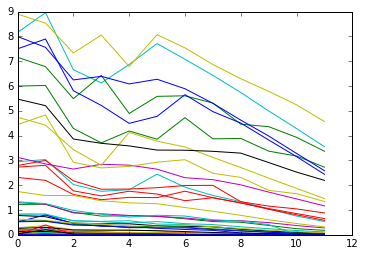

In [70]:
for i, ex in enumerate(ex_list):
    plt.plot(ex[1], label=str(i))

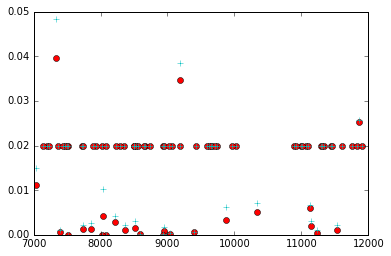

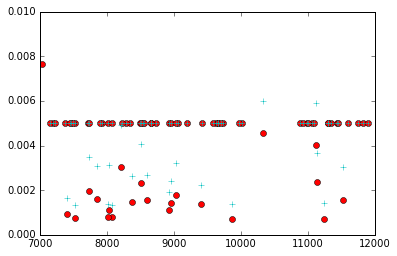

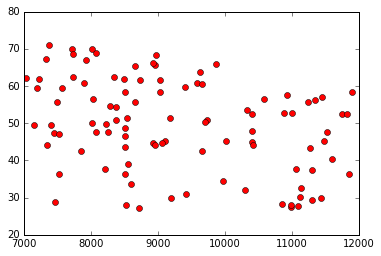

In [71]:
plt.plot([ex[10] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[3] for ex in ex_list], 'ro')

plt.figure()

(0.0, 0.01)

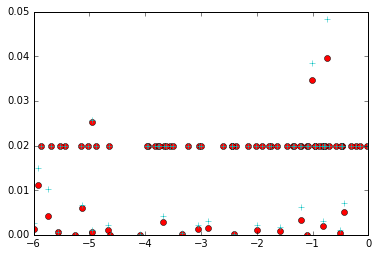

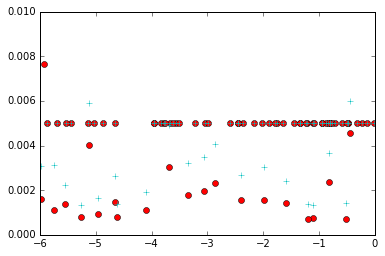

In [73]:
# l2 ほぼ効いてないけど高いほうがよさそう, 0だと学習不安定になる
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)

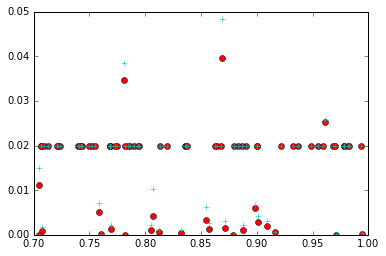

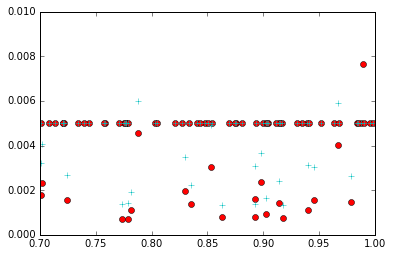

In [74]:
plt.plot([ex[12][0] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[12][0] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot([ex[12][1] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[12][1] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)
plt.figure()

(0.0, 0.01)

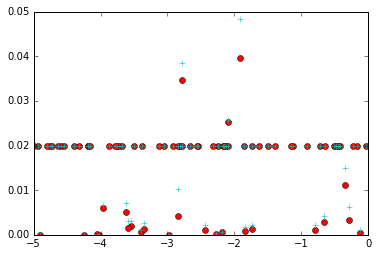

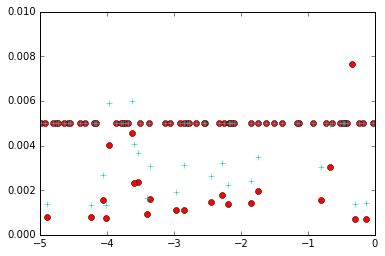

In [75]:
# gamma_scale 敏感すぎ 小さいほうがいい？
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)

(0.0, 0.01)

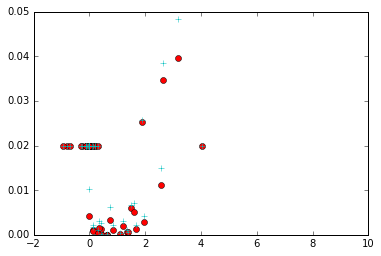

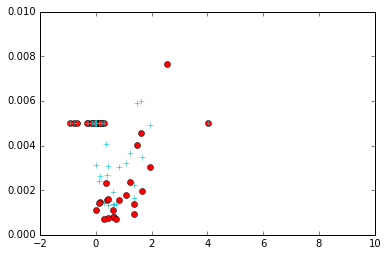

In [76]:
# bias_scale 1が無難
plt.plot([ex[14] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[14] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot([ex[14] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[14] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)

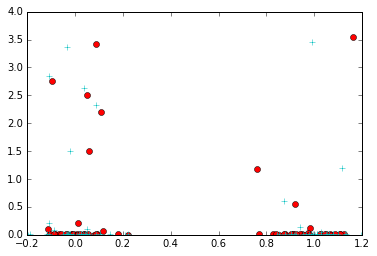

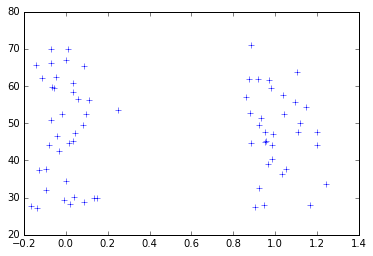

In [61]:
# おなじ
plt.plot([int(ex[15] == ['relu', 'relu'])+0.1*np.random.randn() for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.xlim(-0.2, 1.2)
plt.figure()
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[3] for ex in ex_list], '+')